<a href="https://colab.research.google.com/github/Se7enCodes/K-Means-Image-Compression/blob/main/Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression using **K-means Algorithm**

## Importing libraries

In [166]:
import numpy as np
import matplotlib.pyplot as plt

# To view matplotlib plots directly within the notebook output
%matplotlib inline

## 1. Choosing K Centroids Randomly

In [167]:
def kMeans_init_centroids(X, K):
    # Randomly selects K points from X to serve as the centroids, initially.

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Picks the first K shuffled data points as the initial centroids.
    centroids = X[randidx[:K]]

    return centroids

## 2. Finding Closest Centroid

---



In [168]:
def find_closest_centroids(X, centroids):
    # What this function does is: it assigns each pixel to the nearest color cluster. Later, the pixel is replaced with the centroid's color.

    K = centroids.shape[0]

    idx = np.zeros(X.shape[0], dtype=int)

    for i, x in enumerate(X):
        distances = np.sum((centroids - x) ** 2, axis=1)

        idx[i] = np.argmin(distances)

    return idx

## 3. Computing Centroid

In [169]:
def compute_centroids(X, idx, K):
    # Recalculates the centroids (of all clusters) by computing the mean of all the data points in the specific cluster.

    m, n = X.shape

    centroids = np.zeros((K, n))
    cnt = 0

    for k in range(K):
        points = X[idx == k]

        if len(points) > 0:
            centroids[k] = np.mean(points, axis=0)

    return centroids

## 4. K-means

In [170]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):

    # This is the whole orchestra of the K-means loop.

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]

    centroids = initial_centroids
    previous_centroids = centroids

    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)


        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)

    plt.show()

    return centroids, idx

## File Upload (Image- JPEG)

### Upload

In [171]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Atonement Poster- II.jpg to Atonement Poster- II.jpg
User uploaded file "Atonement Poster- II.jpg" with length 363884 bytes


### Image Processing

In [172]:
# Load the uploaded image
image_name = list(uploaded.keys())[0]
original_img = plt.imread(image_name)

# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
original_img = original_img / 255

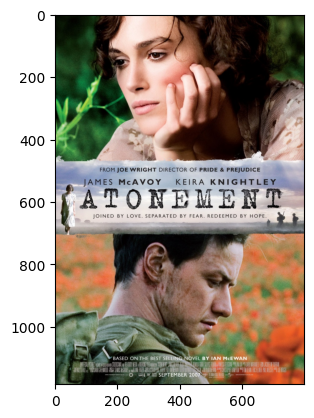

In [173]:
plt.imshow(original_img)

### Transforming Image into Vector

In [174]:
# Reshape the image into an m x 3 matrix where m = number of pixels
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [175]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (1185, 800, 3)


## Modify Compression Dynamics

In [176]:
# K, here being the number of clusters (the number of different colors) in the final compressed image.
K = 16
max_iters = 10

# Using the functions defined above.
initial_centroids = kMeans_init_centroids(X_img, K)

# Running K-Means
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

## View The Final Colors of the Compressed Image

In [177]:
def show_centroid_colors(centroids):
    # Visualizes the K colors represented by the centroids.


    K = centroids.shape[0]

    plt.figure(figsize=(K, 1))

    for i in range(K):
        plt.subplot(1, K, i + 1)
        plt.imshow([centroids[i]])
        plt.axis('off')

    plt.suptitle("Visualizing Centroid Colors", fontsize=16)

    plt.show()

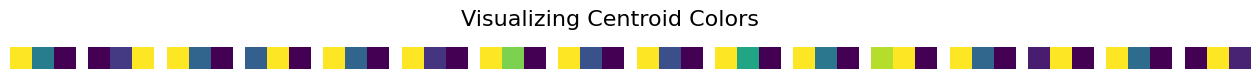

In [178]:
show_centroid_colors(centroids)

### Transforming Vector to the Final Image

In [179]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

## Comparison

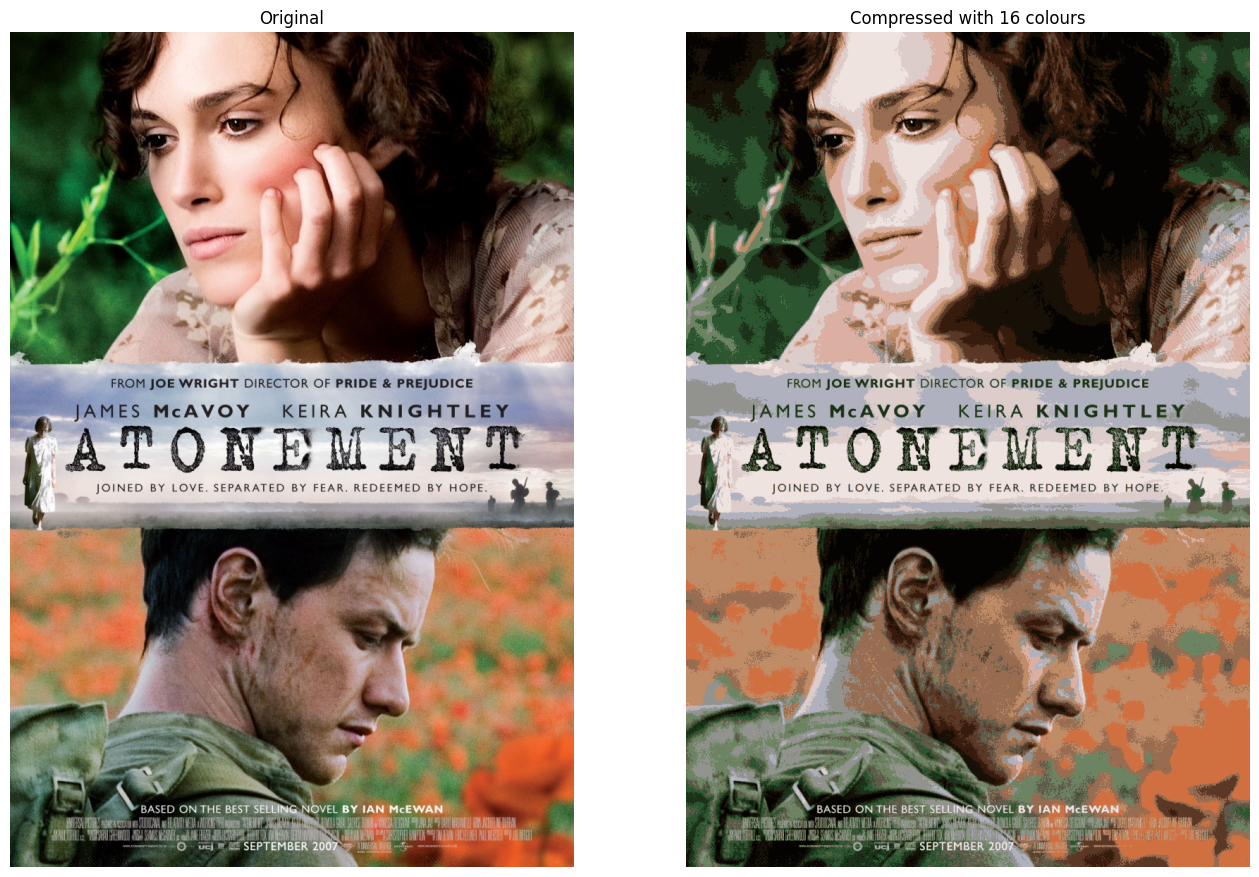

In [180]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()